## Introduction


In this project I will observe and interpret data from the National parks service about various species in different national parks.


## Project goals

My goal is to determine if there are any trends from these national parks and also to explore the relationship between the conservation status of species. To accomplish this goal, I intend to answer some of this questions:

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?


## Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

## Analysis

1. Statistical analysis would be performed using the numpy and pandas library
2. Data visualization would be performed using maptplotlib and seaborn library

### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the data of interest

In [2]:


observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### 3.  Explore and perform analysis on species table

In [3]:
# View the columns and firt few sets of data for species table

species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


### 4.  How many items are in each column for species table?

From the analysis below, there are 5824 rows and 4 columns in the species table. There are no missing data in the Category, scientific_name and common_names columns, but there are a lot of missing values from the conservation_status column. 

Upon further investigation of species table, there appear to be no clear pattern on why there are so many missing values in the conservation_status column. 

My guess is that, these values are missing completely at random

In [4]:
print('There are ' + str (len(species.category.dropna())) + ' items in category')
print('There are ' + str (len(species.scientific_name.dropna())) + ' items in scientific_name')
print('There are ' + str (len(species.common_names.dropna())) + ' items in common_names')
print('There are ' + str (len(species.conservation_status.dropna())) + ' items in conservation_status')
print(f"species shape: {species.shape}")

There are 5824 items in category
There are 5824 items in scientific_name
There are 5824 items in common_names
There are 191 items in conservation_status
species shape: (5824, 4)


### 5. What are the species in the category column?

In [5]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

There are 7 unique categories

### 6. What is the number of animals in each unique category?

In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Here we can see that Vascular plants have the largest amount of members with 4470 members while Reptile has the fewest members with 79

### 7. What is the most endangered category of species

In [7]:
endangered_species = species.loc[species['conservation_status'] == 'Endangered']


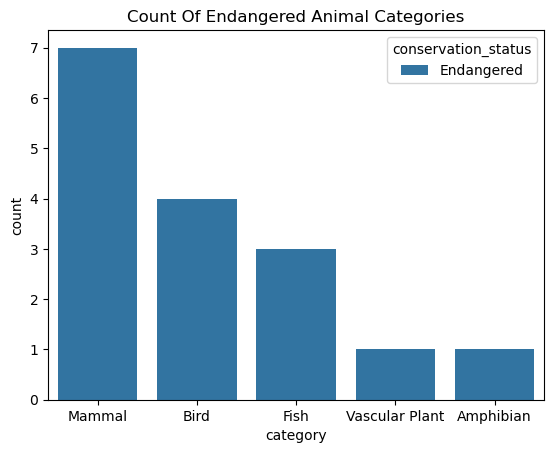

In [8]:
# 7b. Plot showing the most endangerd specie category

sns.countplot(x= endangered_species.category, hue = endangered_species.conservation_status, data = endangered_species)
plt.title('Count Of Endangered Animal Categories')

plt.show()

From the plot above, the most endangered category is the mammalian family, followed by the birds and so on. Vascular plants and Amphibians had similar counts.

We can conclude that Mammalian species are more likely to be endangered.

### 8. What is the distribution of conservation status

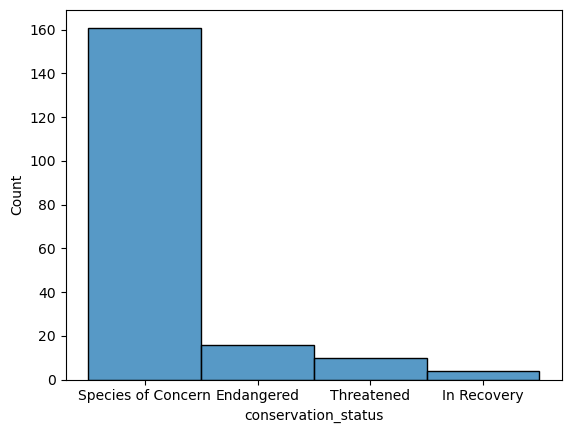

In [9]:
sns.histplot(species.conservation_status)
plt.show()

From this plot, the most popular conservation status is the 'Species of Concern'.
There are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

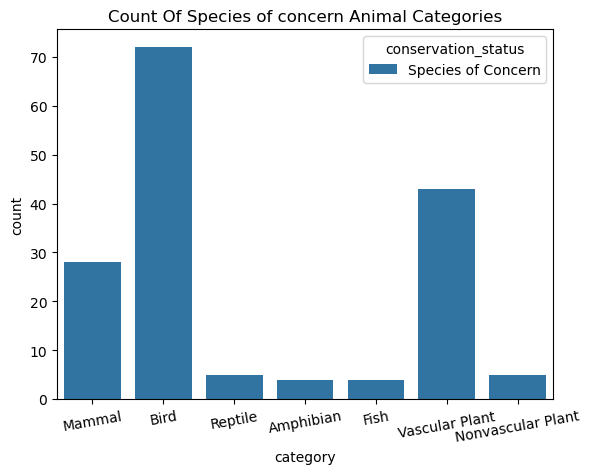

In [10]:
#6. Which specie is the most common specie of concern?
species_of_concern = species.loc[species['conservation_status'] == 'Species of Concern']

sns.countplot(x= species_of_concern.category, hue = species_of_concern.conservation_status, data = species_of_concern)
plt.title('Count Of Species of concern Animal Categories')
plt.xticks(rotation = 10)
plt.show()

The most common specie of concern are the birds as seen from the plot above, followed by the vascular plant families

### 9. Explore and perform analysis on observation table

In [11]:
#9b . View the columns and firt few sets of data for observation table

observation.head(10)

,scientific_name,park_name,observations,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Vicia benghalensis,Great Smoky Mountains National Park,68,NaN,NaN,NaN,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,NaN,NaN,NaN,NaN
2,Prunus subcordata,Yosemite National Park,138,NaN,NaN,NaN,NaN
3,Abutilon theophrasti,Bryce National Park,84,NaN,NaN,NaN,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,NaN,NaN,NaN,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,NaN,NaN,NaN,NaN
6,Spizella pusilla,Yellowstone National Park,228,NaN,0.0,NaN,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,NaN,NaN,NaN,NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,NaN,NaN,NaN,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,NaN,NaN,NaN,NaN


### 10.  What are the park names, and do any of them have missing values?

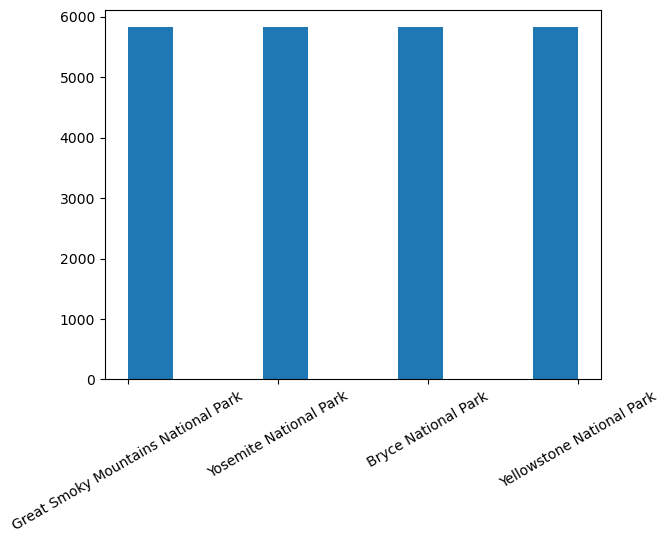

In [12]:
#This shows parkname in figure
plt.hist( observation.park_name)
plt.xticks(rotation = 30)
ax = plt.subplot()
ax.margins(x=0.05)
plt.show()




In [13]:
# This shows parkname in text

observation.groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

From the figure and text above, we can see that each park appeared equal number of times on the observation table.

The question now would be, which of these parks had the largest amount of sightings/obsesrvations? I will explore this below

### 11. What is the total amount of observations made ?

In [14]:
observation.observations.sum()

3314739

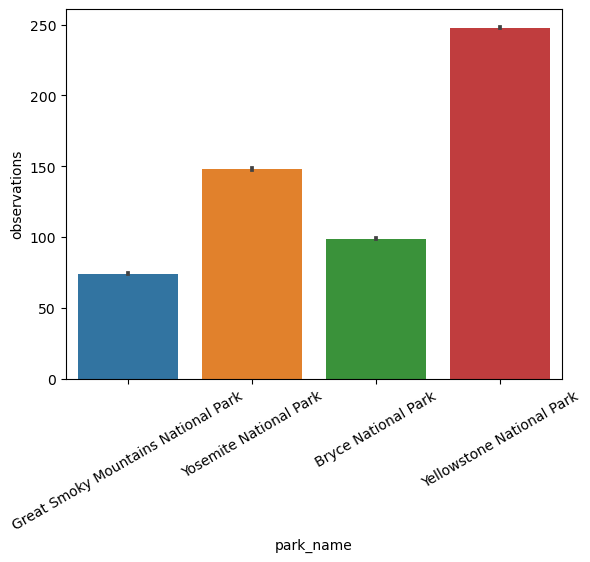

In [15]:
park_observations = observation.groupby("park_name").sum()

sns.barplot(data = park_observations, x= observation.park_name, y = observation.observations)
plt.xticks(rotation = 30)
plt.show()

In [16]:
observation.groupby("park_name").sum()

,observations,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
park_name,,,,,
Bryce National Park,576025,0.0,0.0,0.0,0.0
Great Smoky Mountains National Park,431820,0.0,0.0,0.0,0.0
Yellowstone National Park,1443562,0.0,0.0,0.0,0.0
Yosemite National Park,863332,0.0,0.0,0.0,0.0


From above, Yellowstone National Park had the greatest amount of observations

## Conclusion


This project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

1. What is the distribution of conservation status for species?
   - Majority of the species had no conservation status indicating that there was no issue to their population. 
   - There were 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.
 ###### 
2. Are certain types of species more likely to be endangered?
   - From the analysis above, mammals and birds were more likely to be endangered
   
